# Lets Grow More Task 3

Task3:-Exploratory Data Analysis On Dataset-Terrorism
 

Level INTERMEDIATE

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
terrorism_data= pd.read_csv("globalterrorism.csv") 
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [30]:
terrorism_data.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [31]:
terrorism_data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [32]:
terrorism_data =terrorism_data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
terrorism_data.head()  

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [33]:
terrorism_data.shape 

(181691, 18)

In [34]:
terrorism_data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

combining data

In [35]:
terrorism_data['Wound'] = terrorism_data['Wound'].fillna(0)
terrorism_data['kill'] = terrorism_data['kill'].fillna(0)

In [37]:
terrorism_data['Casualities'] = terrorism_data['kill'] + terrorism_data['Wound']

In [38]:
terrorism_data.isnull().sum()

Year                0
Month               0
day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
Attacktype          0
kill                0
Wound               0
target1           636
summary         66129
Group               0
Targettype          0
Weapon              0
motive         131130
Casualities         0
dtype: int64

dropping the columns

In [39]:
terrorism_data.drop(['motive','summary','latitude','longitude'],axis=1,inplace= True)

In [40]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Attacktype   181691 non-null  object 
 8   kill         181691 non-null  float64
 9   Wound        181691 non-null  float64
 10  target1      181055 non-null  object 
 11  Group        181691 non-null  object 
 12  Targettype   181691 non-null  object 
 13  Weapon       181691 non-null  object 
 14  Casualities  181691 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.8+ MB


In [41]:
terrorism_data.describe() 

,Year,Month,day,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


In [42]:
attack = terrorism_data.Country.value_counts()[:5]
attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

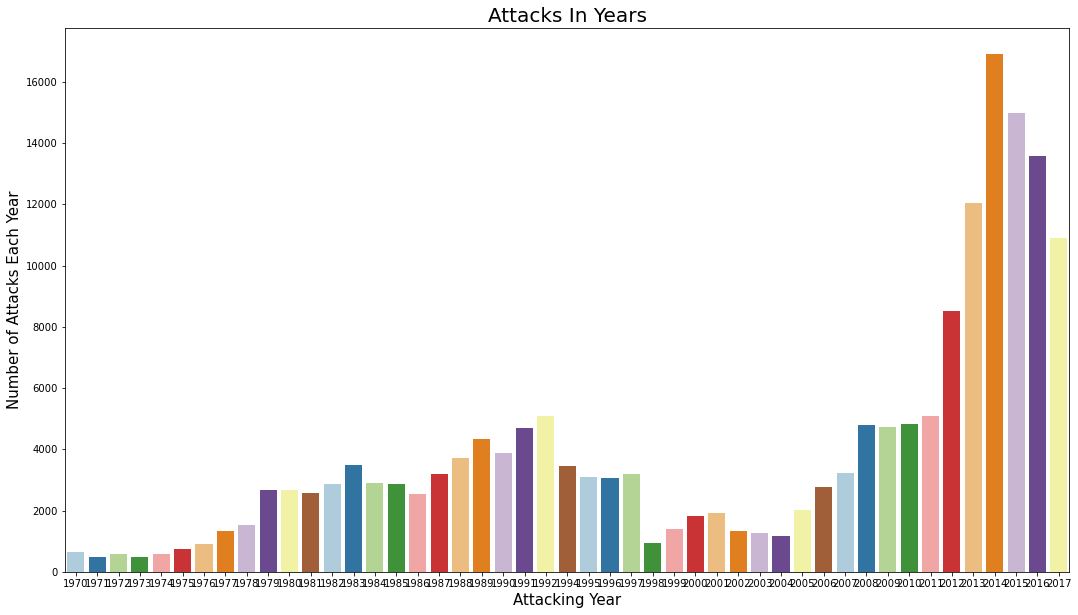

In [56]:
year = terrorism_data['Year'].unique()
years_count = terrorism_data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "Paired")
plt.xlabel('Attacking Year',fontsize=15)
plt.ylabel('Number of Attacks Each Year',fontsize=15)
plt.title('Attacks In Years',fontsize=20)
plt.show()


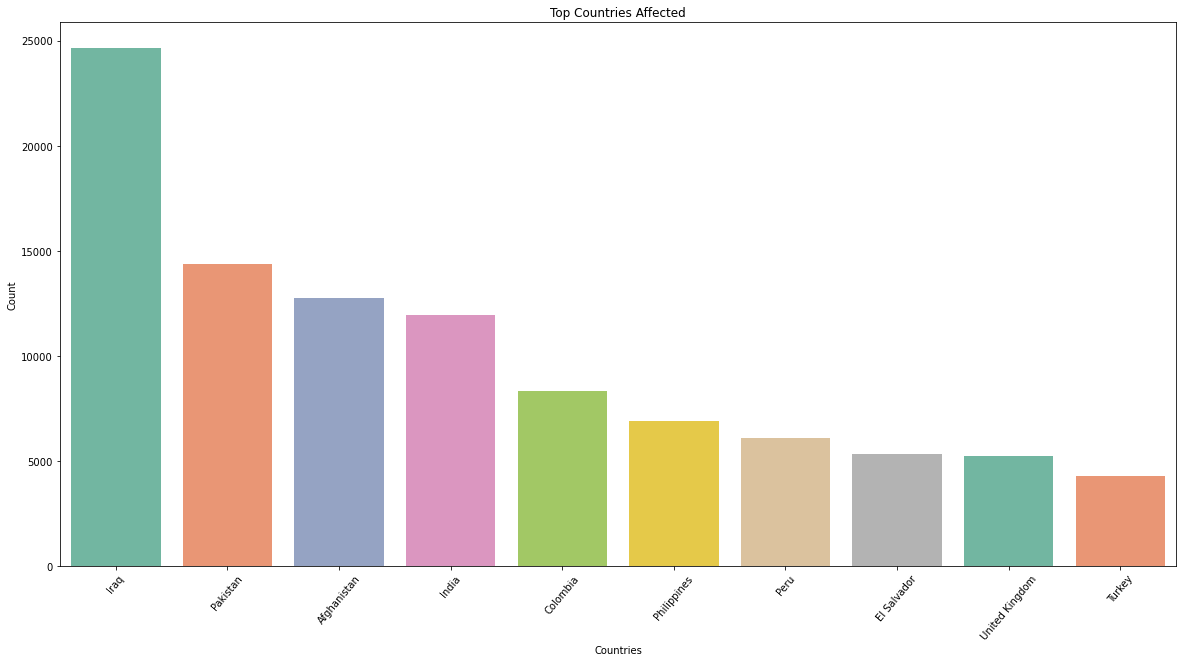

In [44]:
plt.subplots(figsize=(20,10))
sns.barplot(terrorism_data['Country'].value_counts()[:10].index,terrorism_data['Country'].value_counts()[:10].values,palette="Set2")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

Text(0.5, 0, 'Year')

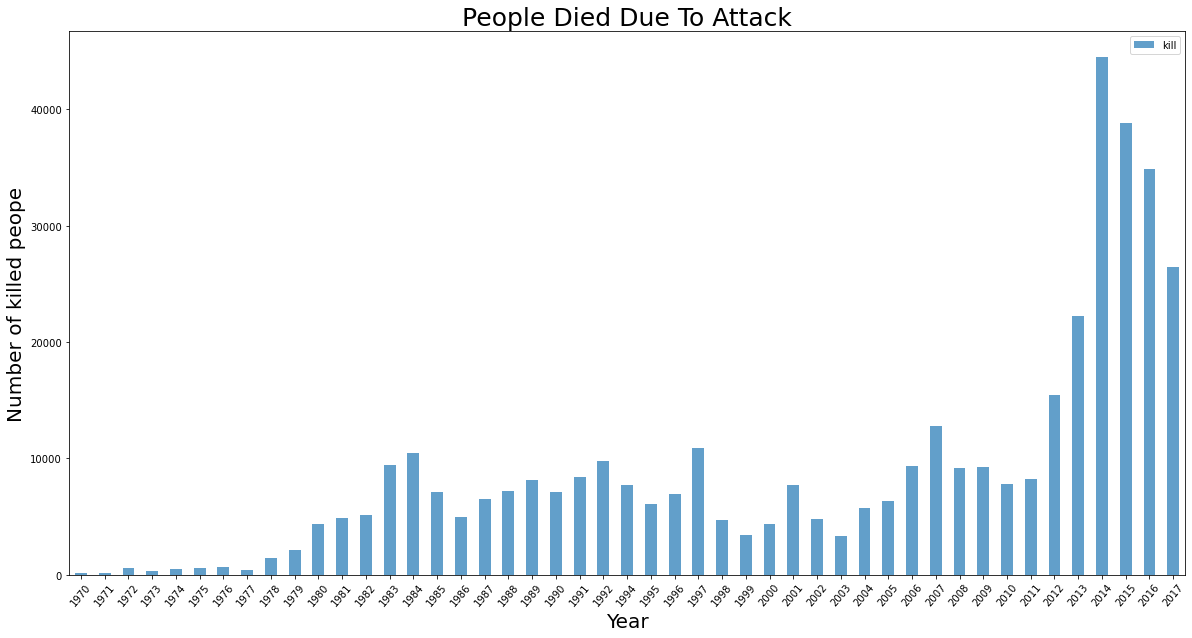

In [47]:
df = terrorism_data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
 

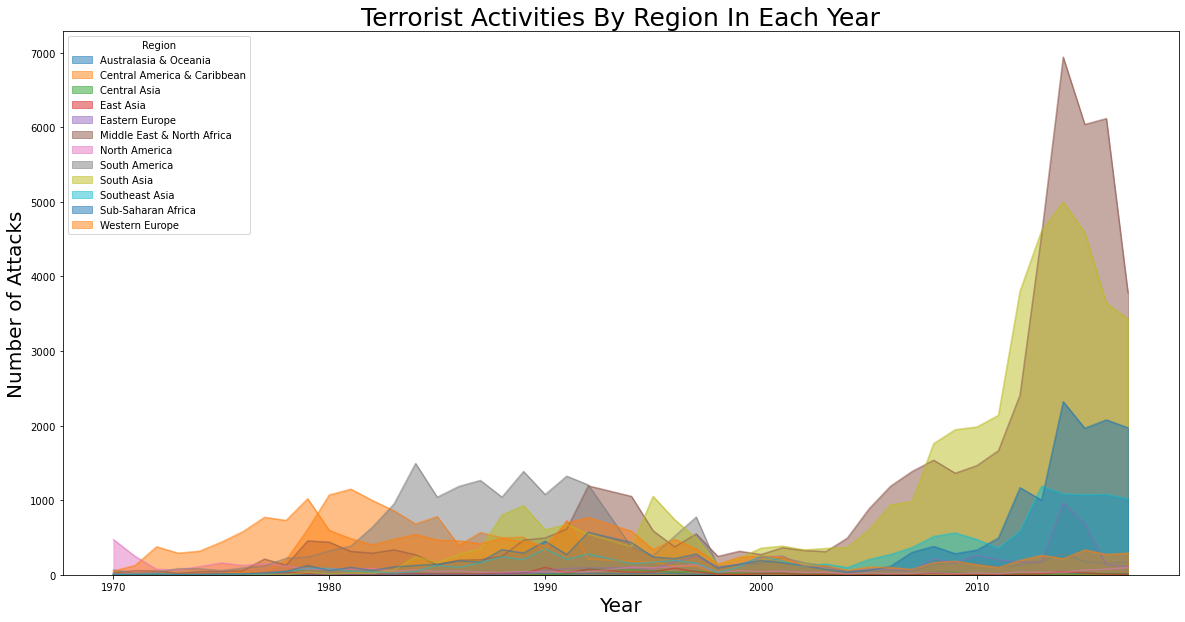

In [48]:
pd.crosstab(terrorism_data.Year, terrorism_data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

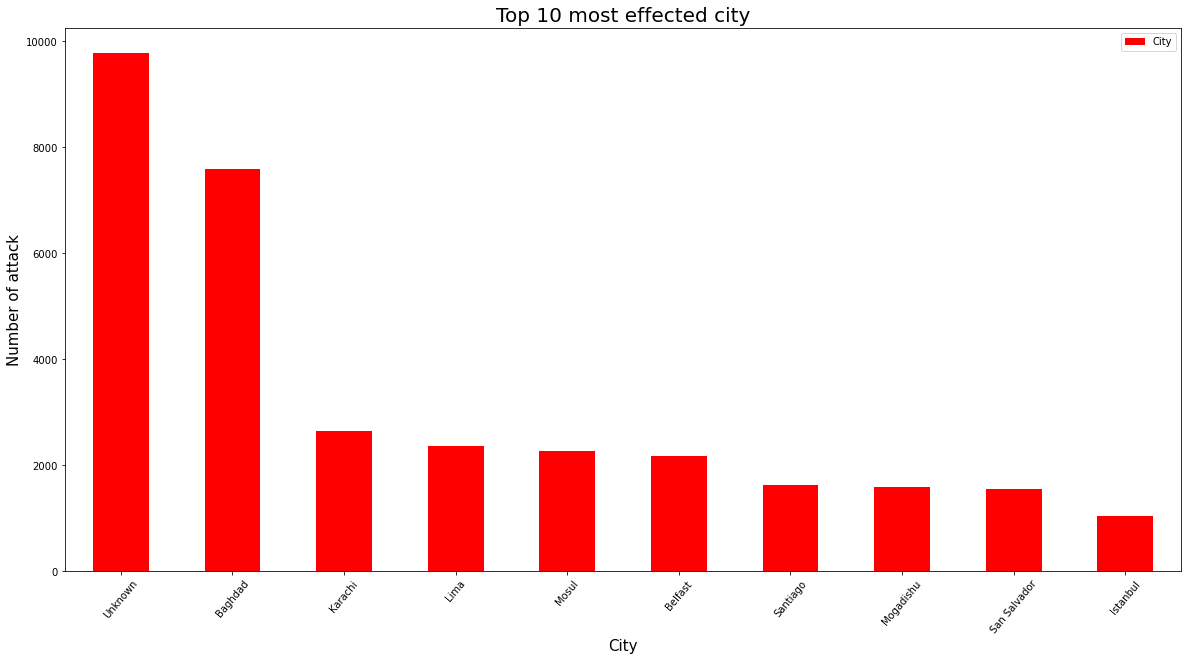

In [21]:
terrorism_data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color="Red")
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()


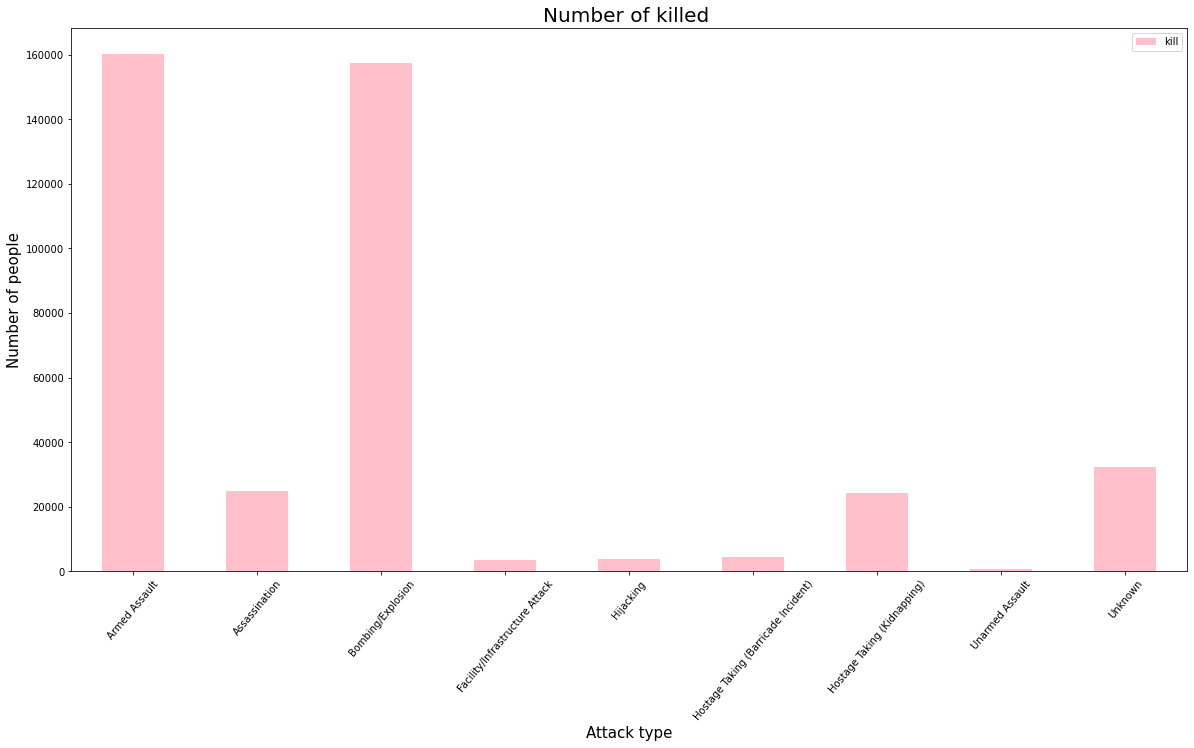

In [49]:
terrorism_data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="pink")
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

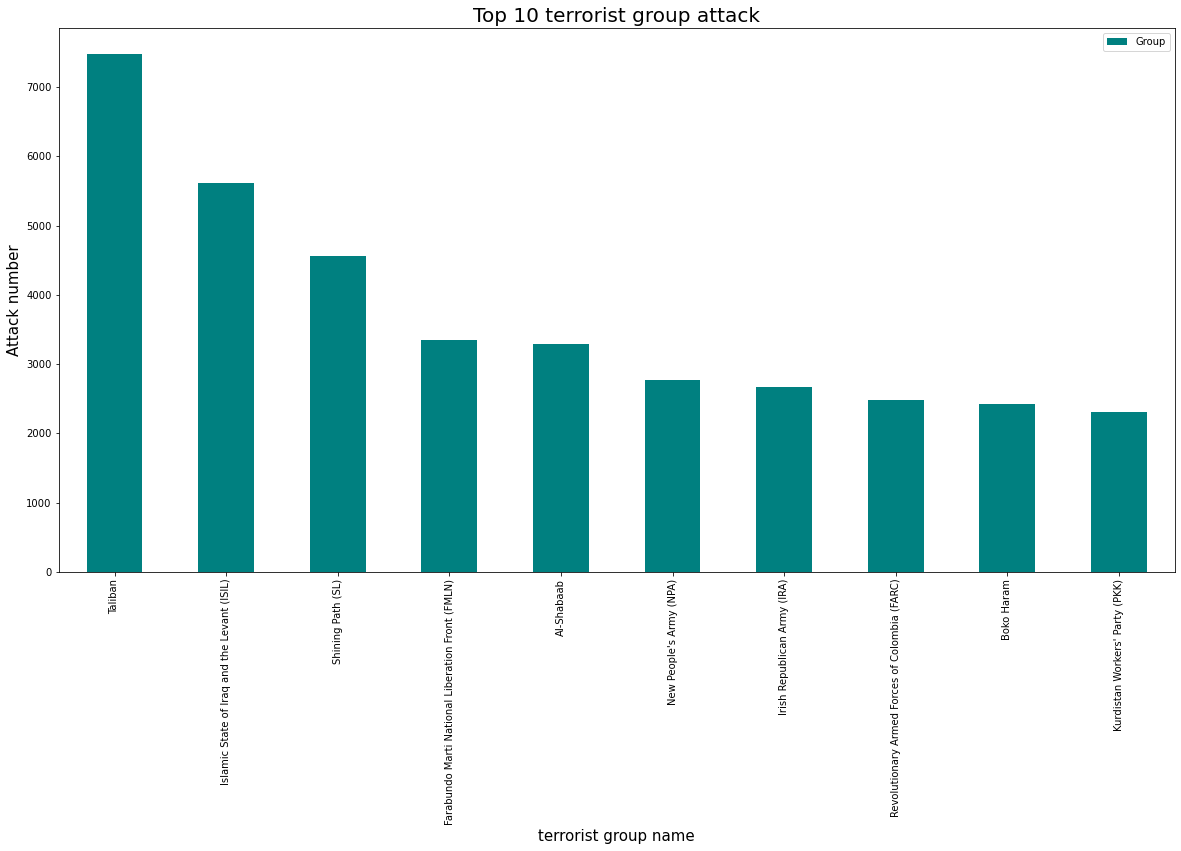

In [51]:
terrorism_data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='Teal',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()


In [52]:
gtr=terrorism_data[['Group','Country','kill']]
gtr=terrorism_data.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
gtr

,Group,Country,Year,Month,day,kill,Wound,Casualities
0,Islamic State of Iraq and the Levant (ISIL),Iraq,9667687,31408,76074,31058.0,23697.0,54755.0
1,Taliban,Afghanistan,14943888,49482,117122,29269.0,27871.0,57140.0
2,Boko Haram,Nigeria,4203203,13202,33374,16917.0,7671.0,24588.0
3,Shining Path (SL),Peru,9024885,29154,70421,11595.0,3030.0,14625.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,3187199,10154,24656,10928.0,10991.0,21919.0
5,Al-Shabaab,Somalia,5775226,18970,44999,8176.0,6025.0,14201.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,6613775,20983,49414,8019.0,4049.0,12068.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,1197127,3918,9938,6883.0,4031.0,10914.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,1758386,5730,12427,6630.0,728.0,7358.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,2686321,8368,20704,6014.0,9518.0,15532.0
